# Insurance Claims- Fraud Detection

Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
data=pd.read_csv('Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.shape

(1000, 40)

In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
data.drop('_c39',axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

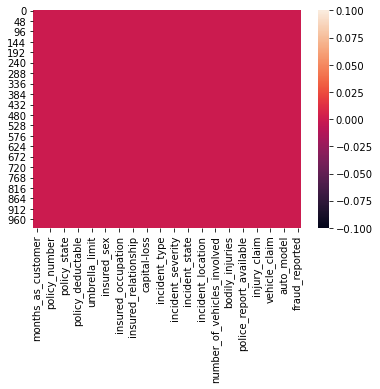

In [9]:
sns.heatmap(data.isnull())

we can see there is no any null values shown in the data

In [10]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# Exploratory Data Analysis

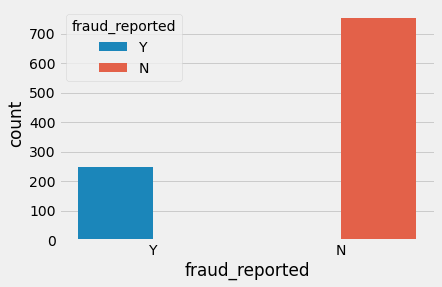

In [11]:
plt.style.use('fivethirtyeight')
ax=sns.countplot(x='fraud_reported',data=data,hue='fraud_reported')

from above plot seems to be most fraud datasets,the label distribution is skewed

In [12]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [13]:
data['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

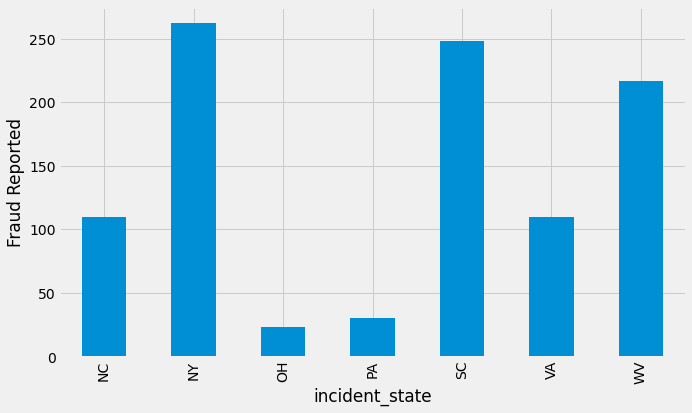

In [14]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=data.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
plt.show()

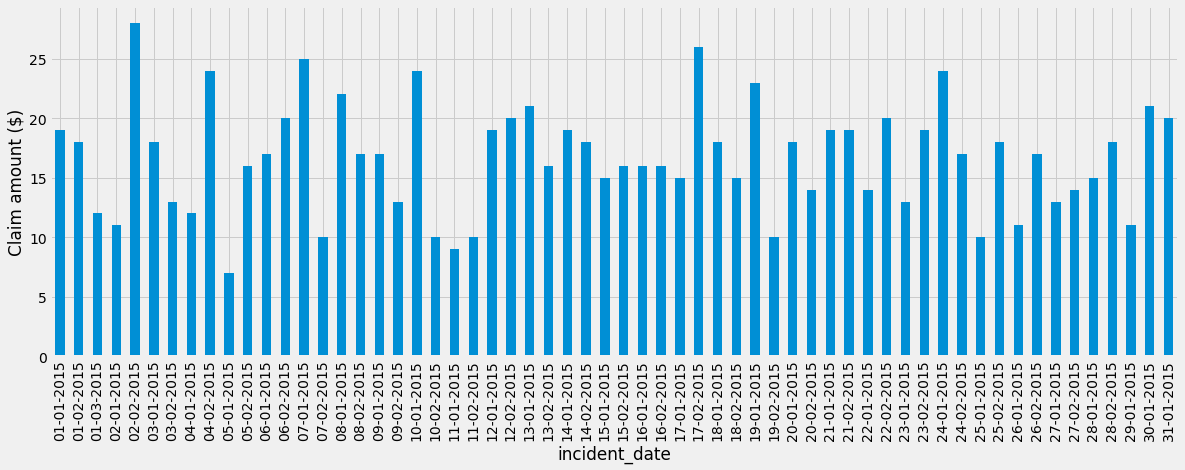

In [15]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(18,6))
ax=data.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

In above plot we can see there are all the cases fot the month of january and february 2015

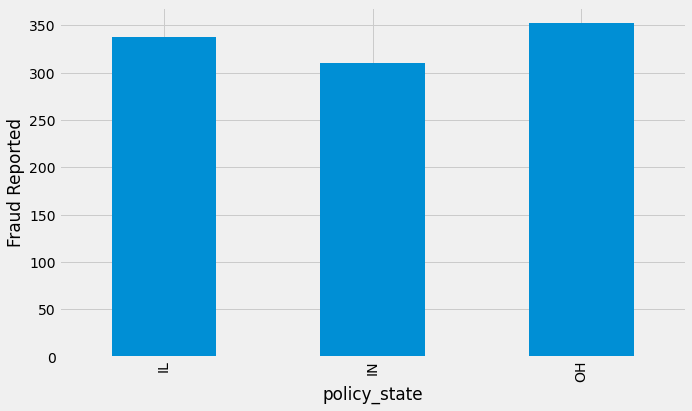

In [16]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=data.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
plt.show()

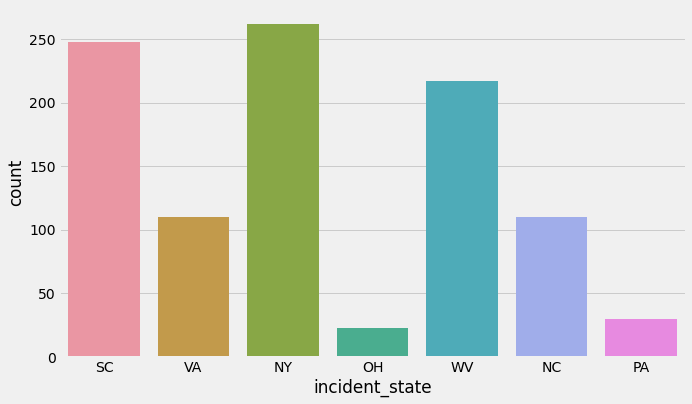

In [17]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(x='incident_state', data=data)

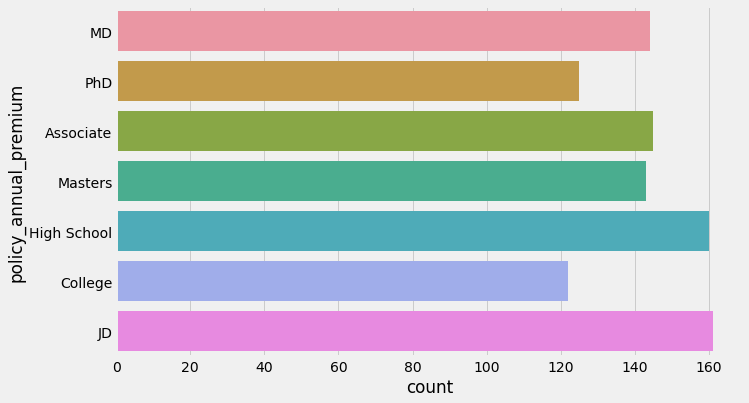

In [18]:
fig =plt.figure(figsize=(10,6))
ax=sns.countplot(y='insured_education_level',data=data)
ax.set_ylabel('policy_annual_premium')
plt.show()

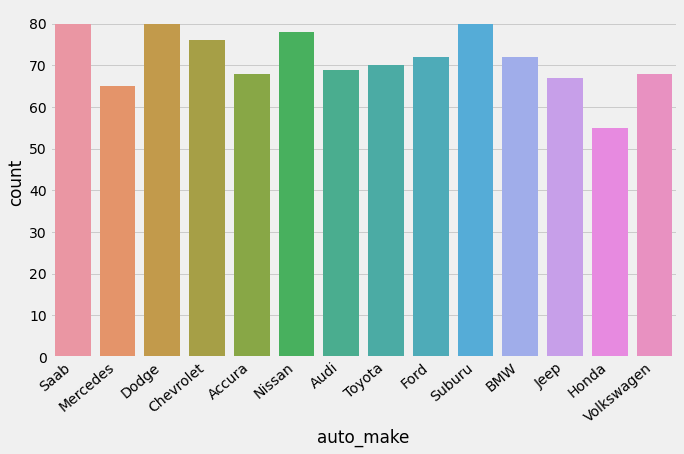

In [19]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(x='auto_make',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

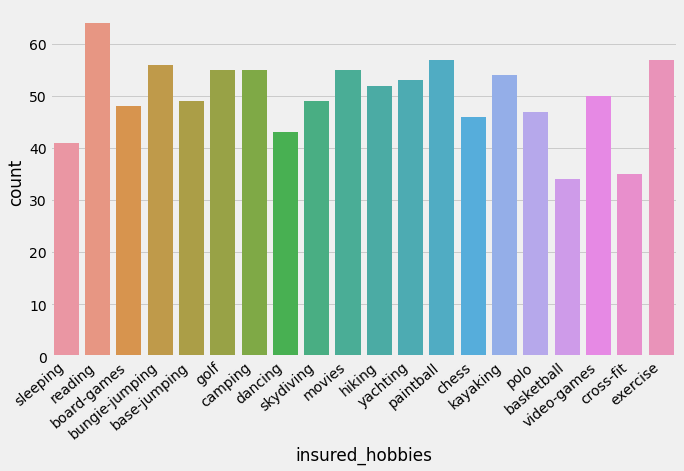

In [20]:
fig=plt.figure(figsize=(10,6))
ax=sns.countplot(x='insured_hobbies',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [21]:
data['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

# Data Processing

now cleaning up the data and preparing for the machine learning model

In [22]:
data['fraud_reported'].replace(to_replace='Y',value=1,inplace=True)
data['fraud_reported'].replace(to_replace='N',value=0,inplace=True)

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [23]:
data[['insured_zip']]=data[['insured_zip']].astype(object)

In [24]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


some variables such as 'policy_bind_date', 'incident_date','incident_location' and 'insured_zip' contains  very high no.of level
so we will remove these columns for our purposes.

In [25]:
# check the spread of years to decide on further action
data.auto_year.value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

auto_year has 21 levels and the no.of records for each levels is significant consedering datasize is not so large.we will do some feature engineering using this variable consedring.

In [26]:
# Deriving the age of the vehicle based on the yea value
data['vehicle_age']=2018 - data['auto_year']
data['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [27]:
# checking categorical variables

data.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model'],
      dtype='object')

In [28]:
#identifying the '?' variables
unknowns={}
for i in list(data.columns):
    if(data[i]).dtype == object:
      j=np.sum(data[i] =='?')
      unknowns[i]=j
unknowns = pd.DataFrame.from_dict(unknowns,orient='index')
print(unknowns)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_zip                0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0


collision_type,property_damage,police_report_available contain many of the missing values.so firstly isolating these variables.

In [29]:
data.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [30]:
data.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [31]:
data.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [32]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [33]:
data._get_numeric_data().head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,vehicle_age
0,328,48,521585,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,14
1,228,42,342868,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007,1,11
2,134,29,687698,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0,11
3,256,41,227811,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1,4
4,228,44,367455,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,0,9


In [34]:
data._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [35]:
#checking categorical columns
data.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model'],
      dtype='object')

applying label encoder to convert all categorical variables into numerical values

# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'incident_severity','collision_type','property_damage','police_report_available',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location','auto_make', 'auto_model']
for val in list1:
    data[val]=le.fit_transform(data[val].astype(str))

In [39]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,vehicle_age
0,328,48,521585,482,2,1,1000,1406.91,0,430,...,2,71610,6510,13020,52080,2,1,2004,1,14
1,228,42,342868,803,1,1,2000,1197.22,5000000,467,...,0,5070,780,780,3510,12,4,2007,1,11
2,134,29,687698,97,2,0,2000,1413.14,5000000,556,...,1,34650,7700,3850,23100,8,24,2007,0,11
3,256,41,227811,741,0,1,2000,1415.74,6000000,793,...,1,63400,6340,6340,50720,7,28,2014,1,4
4,228,44,367455,92,0,2,1000,1583.91,6000000,835,...,1,6500,1300,650,4550,0,25,2009,0,9


# Train Test Split

In [53]:
x=data.iloc[:,0:-1]
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,482,2,1,1000,1406.91,0,430,...,2,2,71610,6510,13020,52080,2,1,2004,1
1,228,42,342868,803,1,1,2000,1197.22,5000000,467,...,0,0,5070,780,780,3510,12,4,2007,1
2,134,29,687698,97,2,0,2000,1413.14,5000000,556,...,3,1,34650,7700,3850,23100,8,24,2007,0
3,256,41,227811,741,0,1,2000,1415.74,6000000,793,...,2,1,63400,6340,6340,50720,7,28,2014,1
4,228,44,367455,92,0,2,1000,1583.91,6000000,835,...,1,1,6500,1300,650,4550,0,25,2009,0


In [54]:
y=data.iloc[:,-1:]
y.head()

,vehicle_age
0,14
1,11
2,11
3,4
4,9


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.33,random_state=250)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(330, 39)
(330, 1)
(670, 39)
(670, 1)


# Model Building

In [56]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score


In [57]:
logreg=LogisticRegression()
knn=KNeighborsClassifier(5)
svcl=SVC()
adb=AdaBoostClassifier()
dtclf=DecisionTreeClassifier()
rfclf=RandomForestClassifier()

In [58]:
model=[logreg,knn,svcl,adb,dtclf,rfclf]

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('accuracy_score:',i)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print(score.mean())
    print(score.std())

accuracy_score: LogisticRegression()
0.050746268656716415
              precision    recall  f1-score   support

           3       0.03      0.06      0.04        32
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00        37
           9       0.02      0.03      0.02        33
          10       0.06      0.24      0.09        25
          11       0.02      0.06      0.03        33
          12       0.06      0.28      0.09        32
          13       0.11      0.22      0.15        32
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        32
          16       0.06      0.03      0.04        35
          17       0.10      0.06      0.08        32
          18       0.25      0.04      0.07        25
          19       0.04

[0.06  0.055 0.05  0.05  0.05 ]
0.05299999999999999
0.003999999999999998
accuracy_score: AdaBoostClassifier()
0.5686567164179105
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        32
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00        35
           7       0.22      1.00      0.35        28
           8       0.00      0.00      0.00        37
           9       0.00      0.00      0.00        33
          10       0.26      1.00      0.42        25
          11       0.00      0.00      0.00        33
          12       0.49      1.00      0.66        32
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        32
          16       1.00      1.00      1.00        35
          17       1.00      1.00      1.00        32
      

[0.585 0.575 0.68  0.615 0.56 ]
0.603
0.04249705872175157


we can see that there is accuracy acore of 100 % is showing on DecisionTreeClassifier

# Saving the Model

In [59]:
import joblib
joblib.dump(dtclf,'DecisionTreeClassifierModel.obj')

['DecisionTreeClassifierModel.obj']